<a href="https://colab.research.google.com/github/ericslevenson/arctic-surface-water/blob/main/TimeSeriesConcatv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Setup

In [1]:
# Google Drive setup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import csv
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr 
from datetime import date
import matplotlib.pyplot as plt

In [3]:
folder = Path('/content/drive/MyDrive/tooliktimeseries')

#### Create Dataset

In [4]:
# Get a list of dataframes from folder
data = [] # list of dataframes
for i in os.listdir(folder):
  dfpath = Path(folder, i) # define path
  df = pd.read_csv(dfpath) # read into csv
  # **CREATE NEW COLUMNS WITH X AND Y COORDINATE**
  df['x'] = df['centroid'].map(lambda centroid: float(centroid.strip('][').split(',')[0])) # x coordinate
  df['y'] = df['centroid'].map(lambda centroid: float(centroid.strip('][').split(',')[1])) # y coordinate
  # ** ADD DATE AS COLUMN**
  df['date'] = date.fromisoformat(i.strip('Toolik.csv')[1:].replace('_', '-'))
  df['date']= pd.to_datetime(df['date']) # convert to proper datetime...could be optimized
  data.append(df)

In [5]:
dslist =[]
for i in data:
  dfs = xr.Dataset(
    {
        'date': (['date'], [i['date'].iloc[0]]),
        'id': (['id'], i['id']),
        'waterPixels': (['id'], i['waterPixels']),
        'clearPixels': (['id'], i['clearPixels']),
        'allPixels': (['id'], i['allPixels'])},
    coords={
        'x': (['id'], i['x']),
        'y': (['id'], i['y'])}
        )
  dslist.append(dfs)

In [6]:
ds = xr.concat(dslist, dim="date")

View the dataset

In [7]:
ds

<xarray.Dataset>
Dimensions:      (date: 5, id: 17827)
Coordinates:
  * date         (date) datetime64[ns] 2020-07-07 2020-07-05 ... 2020-07-08
  * id           (id) object '00000000000000000010' ... '0000000000000000116e'
    x            (id) float64 -150.1 -150.2 -150.8 ... -148.6 -150.4 -150.9
    y            (id) float64 68.66 69.75 69.53 69.57 ... 69.48 69.37 69.69
Data variables:
    waterPixels  (date, id) float64 0.0 0.0 0.0 0.0 ... 2.047e+03 3.405e+03 58.0
    clearPixels  (date, id) float64 87.73 82.53 84.42 ... 5.473e+03 9.72e+03
    allPixels    (date, id) int64 94 87 88 91 92 92 ... 0 2827 2936 5523 9829

Select an example waterody (this one is random)

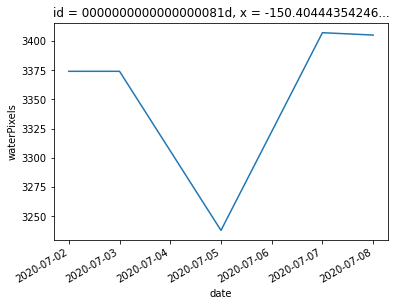

In [8]:
examples = ds.sel(id='0000000000000000081d') 
# Sort by date
examples = examples.sortby('date')
# Plot time series
examples['waterPixels'].plot(x = 'date')